# **AIN 214 - PA3 - FALL 2025**

**Student Number** :2240765048

**Name Surname**   :Demir Emiroğlu


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 15.12.2025 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>

# **Data Prepocessing and Regression**

---
**Dataset Path:** "Data/diamonds.csv"
---

We will deal with the diamonds dataset. The Diamonds dataset contains physical measurements and quality grades for approximately 54,000 round-cut diamonds, used to predict diamond prices based on characteristics such as carat weight, cut quality, color grade, clarity, and dimensions.

**Features:**

* Cut: The quality of the diamond's cut, which affects how well it reflects light; Ideal is the best cut quality.
* Color: The diamond's color grade, where D is completely colorless (best) and J has noticeable yellow tint (worst).
* Clarity: The clarity grade measuring internal flaws (inclusions); IF (Internally Flawless) is best, I1 (Included) is worst.
* Carat: The weight of the diamond; 1 carat = 0.2 grams (ranges from 0.2 to 5.01 carats).
* Depth: The total depth percentage, calculated as z / mean(x, y), representing the height from culet to table divided by average diameter (ranges from 43% to 79%).
* Table: The width of the diamond's top facet (table) relative to its widest point (ranges from 43% to 95%).
* x: The length of the diamond in millimeters (ranges from 0 to 10.74 mm).
* y: The width of the diamond in millimeters (ranges from 0 to 58.9 mm).
* z: The depth/height of the diamond in millimeters (ranges from 0 to 31.8 mm).
* Price: The price of the diamond in US dollars, ranging from \$326 to \$18,823.






# **Necessary Imports**

In [294]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold,cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# **PART- 1: Data Preprocessing (50 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values (if any)
* Visualize the target variable with respect to the features
* Visualize the correlation between the features using a heatmap
* Comment on any findings

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

COMMENT= There is no missing value.


Visualisation of the target variable with respect to the features:


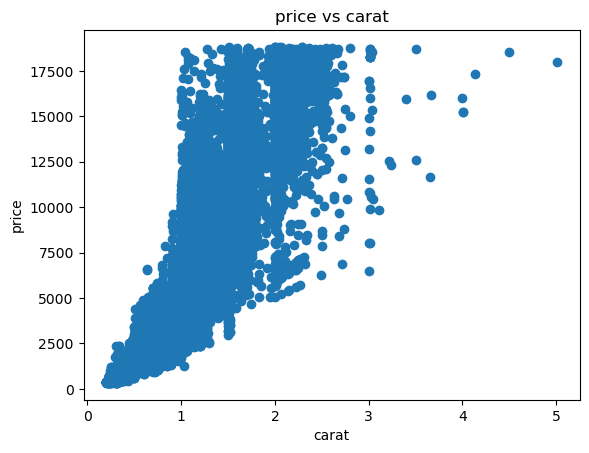

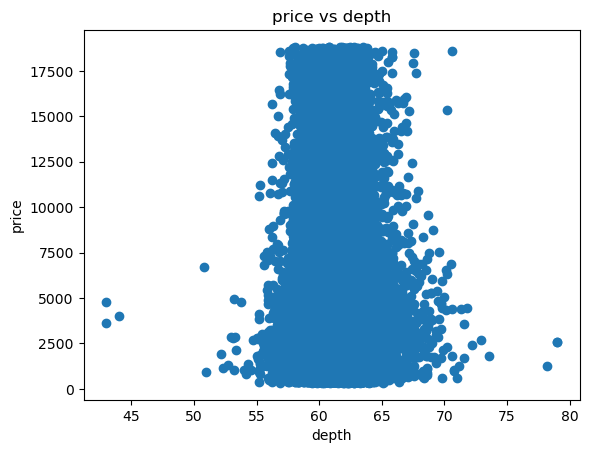

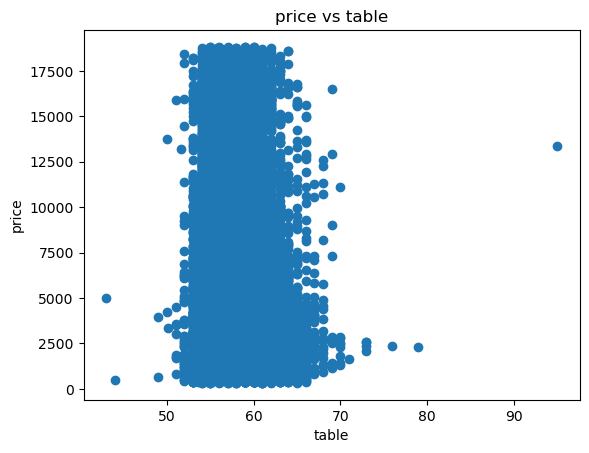

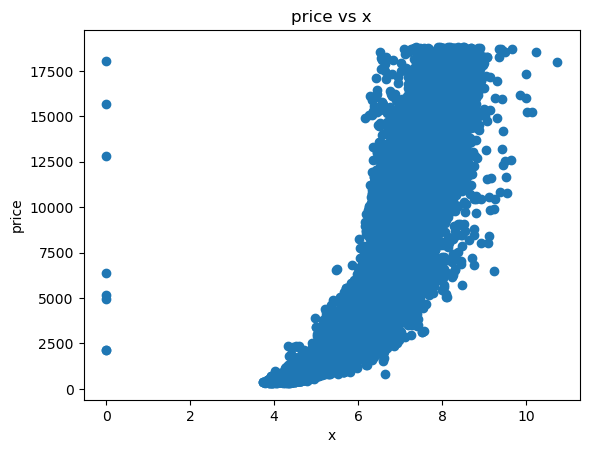

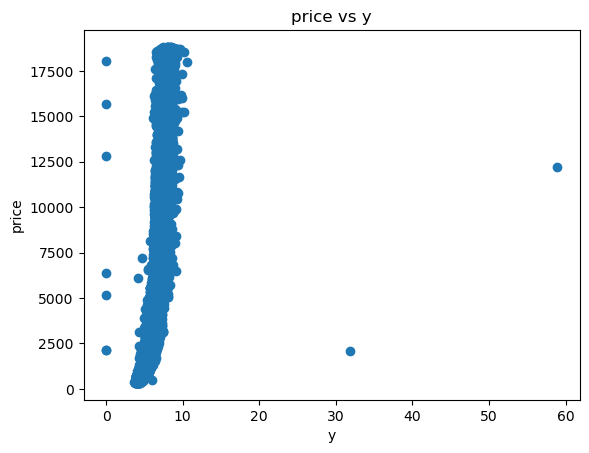

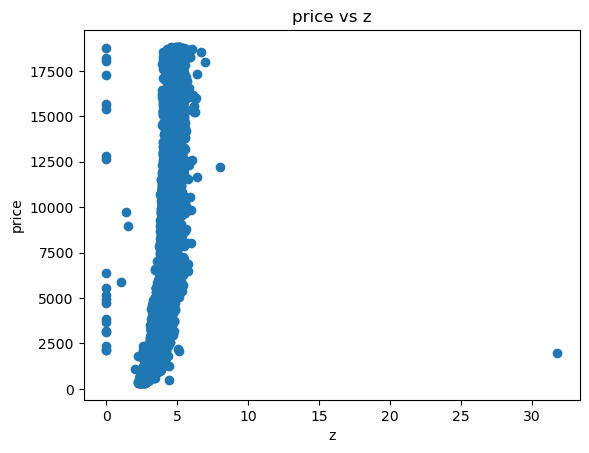

<Figure size 640x480 with 0 Axes>

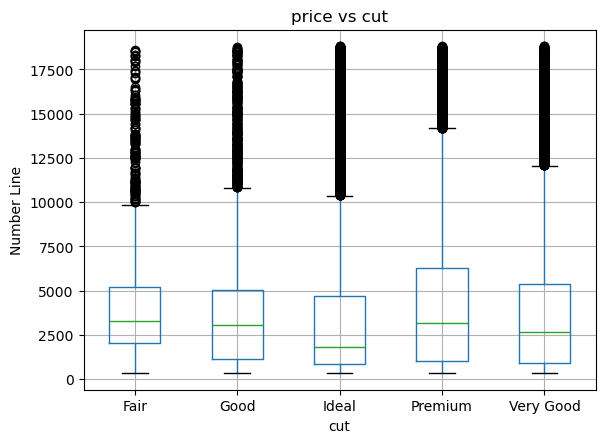

<Figure size 640x480 with 0 Axes>

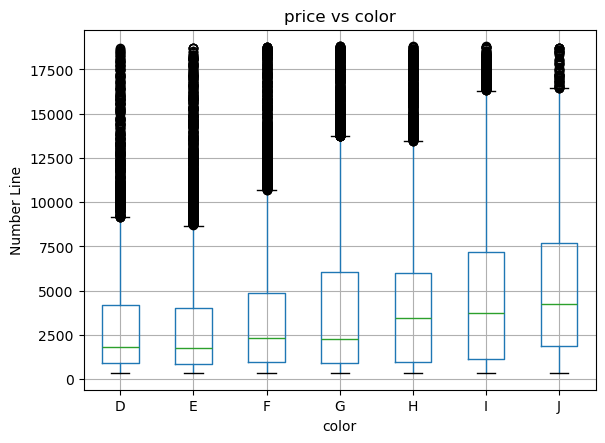

<Figure size 640x480 with 0 Axes>

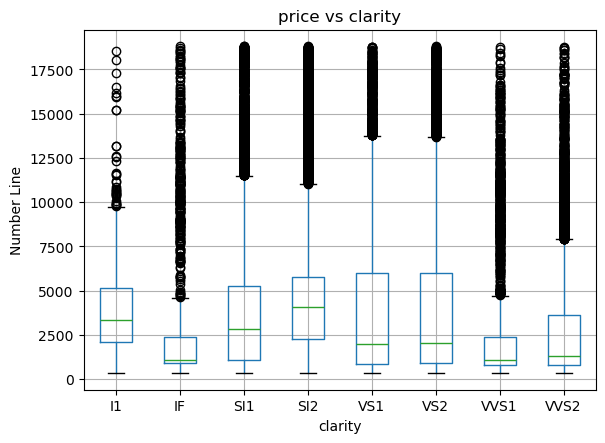



Visualisation of the correlation between the features using heatmap:
  NOTE: Heatmap only includes quantitative variables since categorical variables are not shown with heatmap.


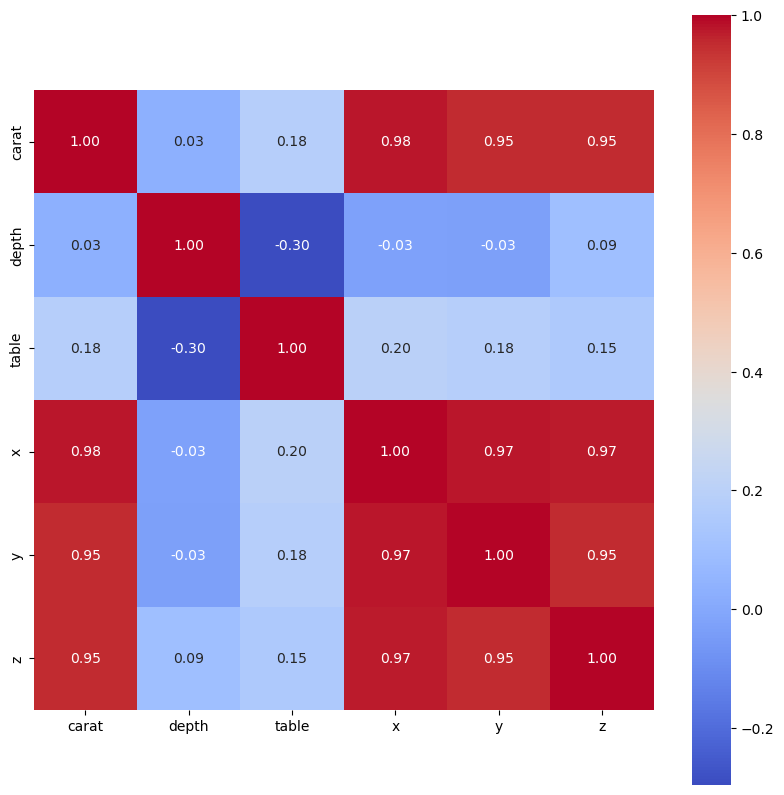


COMMENTS:
1.) From scatter graphs we can see that there are outliers ( dots which are far away from the clustering area are called outliers ).
2.) Heatmap is a symetric matrix and values close to 1 show strong correlation such as 'z' and 'carat' while values close to 0 are almost uncorrelated such as 'depth' and 'carat'.


In [340]:
diamonds_df=pd.read_csv("diamonds.csv")

print(pd.isna(diamonds_df).sum())
print("\nCOMMENT= There is no missing value.")

print("\n\nVisualisation of the target variable with respect to the features:")
quantitative_variables=["carat","depth","table","x","y","z"]
for column in quantitative_variables:
    plt.figure()
    feature=diamonds_df[column]
    plt.scatter(feature,diamonds_df["price"])
    plt.xlabel(column)
    plt.ylabel("price")
    plt.title(f"price vs {column}")
    plt.show()

qualitative_variables=["cut","color","clarity"]
for columns in qualitative_variables:
    plt.figure()
    diamonds_df.boxplot(column="price",by=columns)
    plt.xlabel(columns)
    plt.ylabel("Number Line")
    plt.title(f"price vs {columns}")
    plt.suptitle("")
    plt.show()

print("\n\nVisualisation of the correlation between the features using heatmap:")
print("  NOTE: Heatmap only includes quantitative variables since categorical variables are not shown with heatmap.")
variables=["carat","depth","table","x","y","z"]
plt.figure(figsize=(10,10))
sns.heatmap(diamonds_df[variables].corr(),annot=True,cmap="coolwarm",fmt=".2f",square=True)
plt.show()

print("\nCOMMENTS:\n1.) From scatter graphs we can see that there are outliers ( dots which are far away from the clustering area are called outliers ).\n2.) Heatmap is a symetric matrix and values close to 1 show strong correlation such as 'z' and 'carat' while values close to 0 are almost uncorrelated such as 'depth' and 'carat'.")
    
    

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [386]:
diamonds_df_without_outliers=diamonds_df.copy()
quantitative_variables=["carat","depth","table","x","y","z"]
for variable in quantitative_variables:
    Q3=diamonds_df[variable].quantile(0.75)
    Q1=diamonds_df[variable].quantile(0.25)
    inter_quartile_range=Q3-Q1
    lower_inner_fence=Q1-1.5*inter_quartile_range
    upper_inner_fence=Q3+1.5*inter_quartile_range
    diamonds_df_without_outliers=diamonds_df_without_outliers[
        (diamonds_df_without_outliers[variable]>=lower_inner_fence)
        &
        (diamonds_df_without_outliers[variable]<=upper_inner_fence)]
print("Proof to removal of outliers:")
print("--Number of rows of original dataset:",len(diamonds_df))
print("--Number of rows after removing outliers:",len(diamonds_df_without_outliers))
print("""\nExplanation:I used the method of BOXPLOT because i saw this method in two of my lectures ( IST292 and AIN212 ) so I am knowledgeable of
            boxplots. In this method values less than Q1-1.5*IQR and values higher than Q3+1.5*IQR are classified as 'outliers'. I applied this idea 
            to the dataset.""") 


Proof to removal of outliers:
--Number of rows of original dataset: 53940
--Number of rows after removing outliers: 49304

Explanation:I used the method of BOXPLOT because i saw this method in two of my lectures ( IST292 and AIN212 ) so I am knowledgeable of
            boxplots. In this method values less than Q1-1.5*IQR and values higher than Q3+1.5*IQR are classified as 'outliers'. I applied this idea 
            to the dataset.


## 1.3. Outlier Handling (15 Pts)
Using the selected method, remove the outliers and keep the original dataset as a checkpoint for comparison. After removing the outliers, visualize the updated dataset to show the changes.

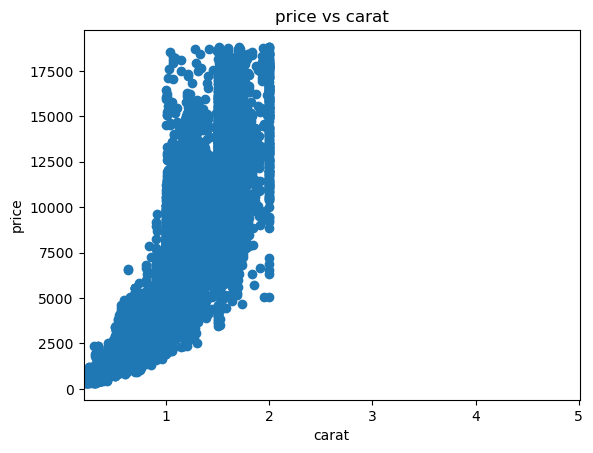

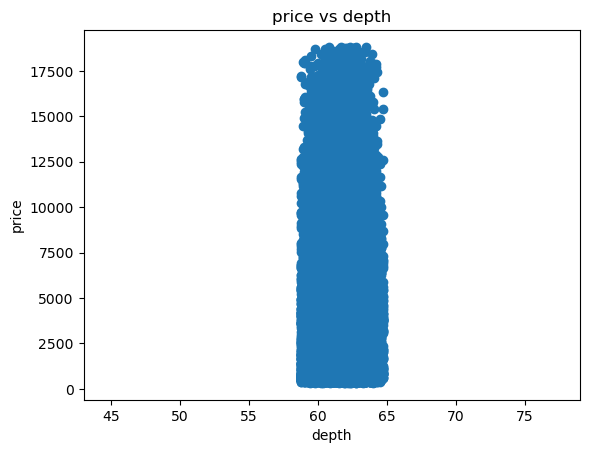

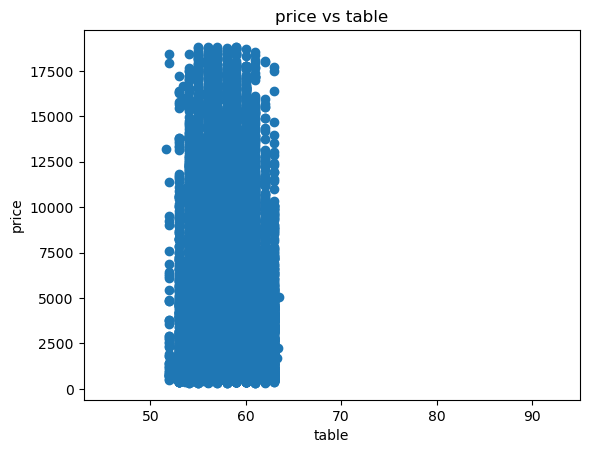

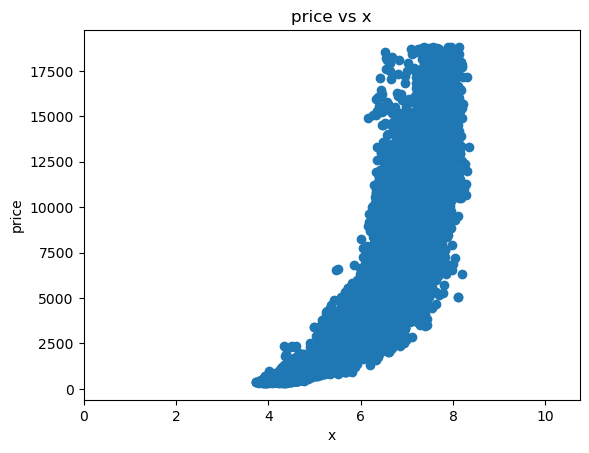

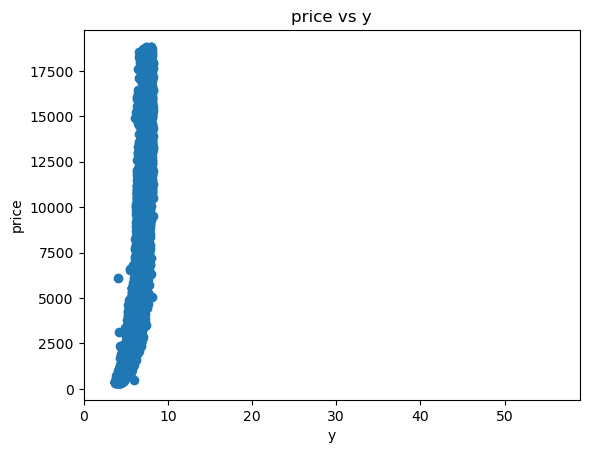

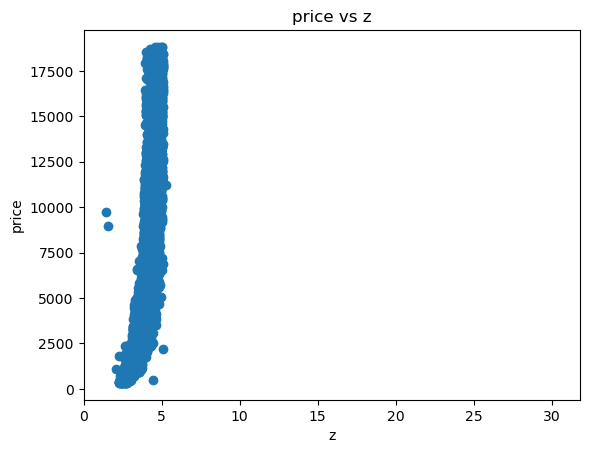

Proof to removal of outliers:
--Number of rows of original dataset: 53940
--Number of rows after removing outliers: 49304


In [137]:
quantitative_variables = ["carat", "depth", "table", "x", "y", "z"]
for column in quantitative_variables:
    plt.figure()
    feature=diamonds_df_without_outliers[column]
    plt.scatter(feature,diamonds_df_without_outliers["price"])
    
    plt.xlim(diamonds_df[column].min(),diamonds_df[column].max()) # this line is very important to maintain the same numerical scale of x-axis 
                                                                  # so we can exactly see the removal of outliers from the scatter graph. 
    plt.xlabel(column)
    plt.ylabel("price")
    plt.title(f"price vs {column}")
    plt.show()
print("Proof to removal of outliers:")
print("--Number of rows of original dataset:",len(diamonds_df))
print("--Number of rows after removing outliers:",len(diamonds_df_without_outliers))

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [338]:
# I WILL CREATE COPPIES OF diamonds_df AND diamonds_df_without_outliers TO STORE ENCODED VERSIONS SEPERATELY FROM ORIGINAL DATASESTS!

df_encoded=diamonds_df.copy()
df_encoded_wo=diamonds_df_without_outliers.copy()
cut_column={"Fair":0,"Good":1,"Very Good":2,"Premium":3,"Ideal":4}
color_column={"J":0,"I":1,"H":2,"G":3,"F":4,"E":5,"D":6}
clarity_column={"I1":0,"SI2":1,"SI1":2,"VS2":3,"VS1":4,"VVS2":5,"VVS1":6,"IF":7}
df_encoded["cut"]=df_encoded["cut"].map(cut_column)
df_encoded["color"]=df_encoded["color"].map(color_column)
df_encoded["clarity"]=df_encoded["clarity"].map(clarity_column)
df_encoded_wo["cut"]=df_encoded_wo["cut"].map(cut_column)
df_encoded_wo["color"]=df_encoded_wo["color"].map(color_column)
df_encoded_wo["clarity"]=df_encoded_wo["clarity"].map(clarity_column)

## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split. (8 Pts)

* ***You  cannot use scikit-learn's shuffle.***

In [380]:
predictor_manual=df_encoded.drop(columns=["price"])
prediction_manual=df_encoded["price"]

IDs=np.random.permutation(len(df_encoded))
training_set = int(0.7 * len(df_encoded))
training_IDs=IDs[:training_set] 
testing_IDs=IDs[training_set:]

predictor_training=predictor_manual.iloc[training_IDs]
predictor_testing=predictor_manual.iloc[testing_IDs]

prediction_training=prediction_manual.iloc[training_IDs]
prediction_testing=prediction_manual.iloc[testing_IDs]

print("TO PROVE THE DATASET IS SHUFFLED:\n")
print("First 10 IDs before shuffling:",list(df_encoded.iloc[:10,0]))
print("First 10 IDs after shuffling:",IDs[:10])
print("Total number of rows of the dataset:",len(predictor_training)+len(predictor_testing))
print("Number of rows in training set:",len(predictor_training))
print("Number of rows in testing set:",len(predictor_testing))

TO PROVE THE DATASET IS SHUFFLED:

First 10 IDs before shuffling: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
First 10 IDs after shuffling: [25636 33778 53267 50973 20010 18183 15973  3361 49474  2669]
Total number of rows of the dataset: 53940
Number of rows in training set: 37758
Number of rows in testing set: 16182


# **PART- 2: REGRESSION (50 Pts)**
* Target value: price
* Predictors: The rest

* ***You can use scikit-learn***




## 2.1. Linear Regression (15 Pts)
* For each version of the dataset (original, outlier removal) do the following steps:
    * Split the data into train and test sets
    * Fit a linear regression model to train data.
    * Predict the test set and calculate the MSE value.
* Perform a comparison between the regression performance on the original dataset and the dataset after outlier removal. Analyze and interpret the results, discussing how outlier removal affects model accuracy and generalization.

In [175]:
#FOR ORIGINAL: ( I USED %70 TRAIN, %30 TEST BECAUSE IT WAS ALSO ASKED LIKE THAT IN QUESTION 1.5 )
predictors=df_encoded.drop(columns=["price"])
target=df_encoded["price"]
predictors_train,predictors_test,target_train,target_test=train_test_split(predictors,target,test_size=0.3,random_state=42)
Linear_Regression=LinearRegression()
Linear_Regression.fit(predictors_train,target_train)
target_prediction=Linear_Regression.predict(predictors_test)
MSE_original=mean_squared_error(target_test,target_prediction)
print(f"Mean Squared Error of original dataset is:{MSE_original}")

#FOR OUTLIER REMOVED: ( I USED %70 TRAIN, %30 TEST BECAUSE IT WAS ALSO ASKED LIKE THAT IN QUESTION 1.5 )
predictors_wo=df_encoded_wo.drop(columns=["price"])
target_wo=df_encoded_wo["price"]
predictors_wo_train,predictors_wo_test,target_wo_train,target_wo_test=train_test_split(predictors_wo,target_wo,test_size=0.3,random_state=42)
Linear_Regression_wo=LinearRegression()
Linear_Regression_wo.fit(predictors_wo_train,target_wo_train)
target_wo_prediction=Linear_Regression_wo.predict(predictors_wo_test)
MSE_outlier_removed=mean_squared_error(target_wo_test,target_wo_prediction)
print(f"Mean Squared Error of outlier removed dataset is:{MSE_outlier_removed}")

print("""\nCOMPARISON:Our aim for removing the outlier is to minimize the error, MSE in this question, because outliers do not represent the dataset
           truely. Calculating MSE is a verification method for how well our regression model fit to the dataset. The MSE of original dataset 
           is higher than the MSE of outlier removed dataset which proves that we handled outlier values correctly. By removing outliers our 
           regression model showed a better performance, worked more accurately to predict target variable ( which is price ) and showed a 
           better generalization.""")
                     
    
      

Mean Squared Error of original dataset is:1435878.2282089689
Mean Squared Error of outlier removed dataset is:1066629.7669087506

COMPARISON:Our aim for removing the outlier is to minimize the error, MSE in this question, because outliers do not represent the dataset
           truely. Calculating MSE is a verification method for how well our regression model fit to the dataset. The MSE of original dataset 
           is higher than the MSE of outlier removed dataset which proves that we handled outlier values correctly. By removing outliers our 
           regression model showed a better performance, worked more accurately to predict target variable ( which is price ) and showed a 
           better generalization.


## 2.2. Cross Validation on Linear Regression (10 Pts)
Apply K-Fold Cross Validation on the Linear Regression model using both the original dataset and the outlier-removed dataset. Based on the cross-validation results (mean and standard deviation of R² and RMSE), explain what the metrics demonstrate about the stability and generalization ability of the model.

In [229]:
#  I CHOSE k AS 5 BUT IT CAN ALSO TAKE DIFFERENT VALUES

k=5
k_fold=KFold(n_splits=k,shuffle=True,random_state=42)
Linear_Regression_cv=LinearRegression()

predictorss=df_encoded.drop(columns=["price"])
targett=df_encoded["price"]
R_squared=cross_val_score(Linear_Regression_cv,predictorss,targett,cv=k_fold,scoring="r2")
RMSE=np.sqrt(-cross_val_score(Linear_Regression_cv,predictorss,targett,cv=k_fold,scoring="neg_mean_squared_error"))
print("For ORIGINAL DATASET:")
print("Mean of RMSE:",RMSE.mean())
print("Standart deviation of RMSE:",RMSE.std())
print("Mean of R-squared:",R_squared.mean())
print("Standart deviation of R-squared:",R_squared.std())

predictorss_wo=df_encoded_wo.drop(columns=["price"])
targett_wo=df_encoded_wo["price"]
R_squared_wo=cross_val_score(Linear_Regression_cv,predictorss_wo,targett_wo,cv=k_fold,scoring="r2")
RMSE_wo=np.sqrt(-cross_val_score(Linear_Regression_cv,predictorss_wo,targett_wo,cv=k_fold,scoring="neg_mean_squared_error"))
print("\nFor OUTLIER REMOVED DATASET:")
print("Mean of RMSE:",RMSE_wo.mean())
print("Standart deviation of RMSE:",RMSE_wo.std())
print("Mean of R-squared:",R_squared_wo.mean())
print("Standart deviation of R-squared:",R_squared_wo.std())

print("""\nEXPLANATION: 
      -For STABILITY, standart deviation plays a key role because it indicates the how stable the model make predictions 
      through folds. Outlier removed dataset has both lower standart deviation of R-squared and RMSE which means it is more 
      stable than the original dataset because there are less flactuations between datapoints (because we removed extreme 
      values, outliers).
      -For GENERALIZATION, mean plays a key role because in this way we get the average performance of success of model on 
      test data (if we dont get the mean, referring to the entire dataset with only one value will be less efficient and 
      less meaningfull.) Outlier removed dataset has a lower mean RMSE that means there is a lower error rate which is 
      what we expect by removing outliers. On the other hand mean R-squared values are almost the same ( as I increase k
      values mean R-squared value of outlier removed dataset exceed R-squared value of original dataset, I observed this 
      by gradually increasing k=30, k=50 in my code) which does not show that original dataset works better because maximum
      value of R-squared is 1 and for  both our datasets  R-squared is so close to 1. Also mean RMSE is a better option than
      R-squared for generalization.""")
      



For ORIGINAL DATASET:
Mean of RMSE: 1215.6966078191592
Standart deviation of RMSE: 24.298225887336468
Mean of R-squared: 0.9070996661953996
Standart deviation of R-squared: 0.0034244294132836786

For OUTLIER REMOVED DATASET:
Mean of RMSE: 1048.5723737068304
Standart deviation of RMSE: 16.117252761092676
Mean of R-squared: 0.9065561980496206
Standart deviation of R-squared: 0.001182446055453899

EXPLANATION: 
      -For STABILITY, standart deviation plays a key role because it indicates the how stable the model make predictions 
      through folds. Outlier removed dataset has both lower standart deviation of R-squared and RMSE which means it is more 
      stable than the original dataset because there are less flactuations between datapoints (because we removed extreme 
      values, outliers).
      -For GENERALIZATION, mean plays a key role because in this way we get the average performance of success of model on 
      test data (if we dont get the mean, referring to the entire dat

## 2.3. kNN Regression (15 Pts)
* For each version of the dataset (original, outlier-removed), execute the following steps:
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-10, then fit kNN regression model to train data.
    * Predict the test set and calculate the MSE value for each k.
    * Plot the MSE vs k curve to decide on the optimal k.
    * Report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?
* After identifying the dataset and k value that gives the best performance, apply feature scaling (e.g., StandardScaler) to that dataset only. Repeat the kNN regression steps with scaled data and analyze how scaling changes the results compared to the non-scaled version.

FOR ORIGINAL DATASET:

MSE for k=3 is 49759.2234684629
MSE for k=5 is 69437.07032258065
MSE for k=7 is 100495.33160049336


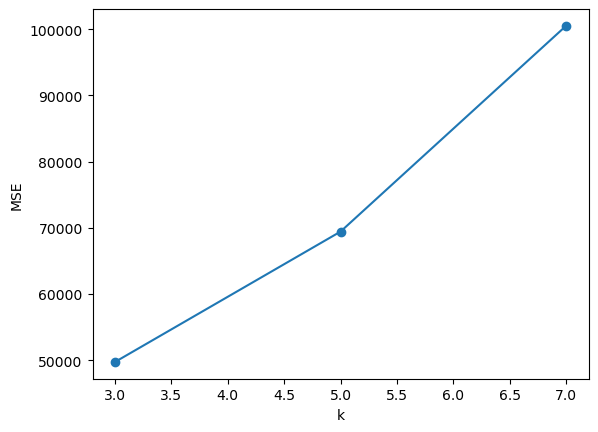

According to the graph most optimal k is 3 because MSE is lowest when k=3.
R-squared for k=3 is: 0.9968698633484041 


FOR OUTLIER REMOVED DATASET:

MSE for k=3 is 86357.52002839469
MSE for k=5 is 124490.9406226549
MSE for k=7 is 165389.16436839418


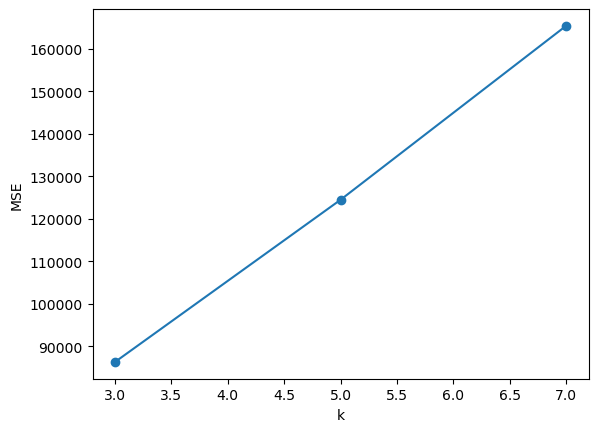

According to the graph most optimal k is 3 because MSE is lowest when k=3.
R-squared for k=3 is: 0.9922817130352601
COMMENT: Original dataset has lower MSE and higher R-squared value than outlier removed dataset. Actually this is something I wasnt expecting
         , I expected reverse of this situation to happen, but from the previos steps I proved that removing outliers worked well and allowed 
         better predictions. Here, original dataset gave better results probably because of size of the dataset and difference in local 
         distributions of datapoints.


FOR SCALED DATA:

MSE for k=3 is 406782.7110781527
MSE for k=5 is 391609.4897886541
MSE for k=7 is 394140.66074549954


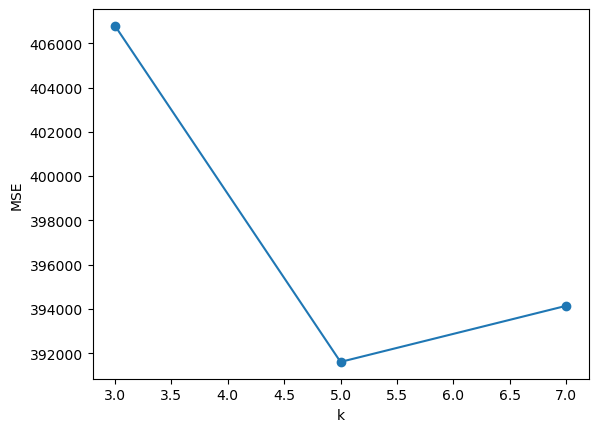

According to the graph most optimal k is 5 because MSE is lowest when k=5.
R-squared for k=5 is: 0.9753655476983656

COMMENT: Original dataset has lower MSE and higher R-squared value than scaled dataset. This means non-scaled(original) data gave better
         predictions, to this dataset according to my results of code, than scaled data.


In [344]:
#FOR ORIGINAL: ( I USED %80 TRAIN, %20 TEST )
#              ( I USED 3,5,7 FOR k VALUES  )

Predictors=df_encoded.drop(columns=["price"])
Target=df_encoded["price"]
Predictors_train,Predictors_test,Target_train,Target_test=train_test_split(Predictors,Target,test_size=0.2,random_state=42)
k_values=[3,5,7]
MSE_values=[]
print("FOR ORIGINAL DATASET:\n")
for k in k_values:
    k_nearest_neighbors=KNeighborsRegressor(n_neighbors=k)
    k_nearest_neighbors.fit(Predictors_train,Target_train)
    Target_prediction=k_nearest_neighbors.predict(Predictors_test)
    MSE=mean_squared_error(Target_test,Target_prediction)
    MSE_values.append(MSE)
    print(f"MSE for k={k} is {MSE}")
plt.plot(k_values,MSE_values,marker="o")
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()
print("According to the graph most optimal k is 3 because MSE is lowest when k=3.")
k_nearest_neighbors=KNeighborsRegressor(n_neighbors=3)
k_nearest_neighbors.fit(Predictors_train,Target_train)
Target_prediction=k_nearest_neighbors.predict(Predictors_test)
R_squared_value=r2_score(Target_test,Target_prediction)
print("R-squared for k=3 is:",R_squared_value,"\n\n")


#FOR OUTLIER REMOVED:
Predictors_wo=df_encoded_wo.drop(columns=["price"])
Target_wo=df_encoded_wo["price"]
Predictors_wo_train,Predictors_wo_test,Target_wo_train,Target_wo_test=train_test_split(Predictors_wo,Target_wo,test_size=0.2,random_state=42)
k_values=[3,5,7]
MSE_wo_values=[]
print("FOR OUTLIER REMOVED DATASET:\n")
for k in k_values:
    k_nearest_neighbors=KNeighborsRegressor(n_neighbors=k)
    k_nearest_neighbors.fit(Predictors_wo_train,Target_wo_train)
    Target_wo_prediction=k_nearest_neighbors.predict(Predictors_wo_test)
    MSE_wo=mean_squared_error(Target_wo_test,Target_wo_prediction)
    MSE_wo_values.append(MSE_wo)
    print(f"MSE for k={k} is {MSE_wo}")
plt.plot(k_values,MSE_wo_values,marker="o")
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()
print("According to the graph most optimal k is 3 because MSE is lowest when k=3.")
k_nearest_neighbors=KNeighborsRegressor(n_neighbors=3)
k_nearest_neighbors.fit(Predictors_wo_train,Target_wo_train)
Target_wo_prediction=k_nearest_neighbors.predict(Predictors_wo_test)
R_squared_wo_value=r2_score(Target_wo_test,Target_wo_prediction)
print("R-squared for k=3 is:",R_squared_wo_value)

print("""COMMENT: Original dataset has lower MSE and higher R-squared value than outlier removed dataset. Actually this is something I wasnt expecting
         , I expected reverse of this situation to happen, but from the previos steps I proved that removing outliers worked well and allowed 
         better predictions. Here, original dataset gave better results probably because of size of the dataset and difference in local 
         distributions of datapoints.\n\n""")
#FEATURE SCALING:
standard_scaler=StandardScaler()
Predictors_train_s=standard_scaler.fit_transform(Predictors_train)
Predictors_test_s=standard_scaler.transform(Predictors_test)
k_nearest_neighbors.fit(Predictors_train_s,Target_train)
Target_prediction_s=k_nearest_neighbors.predict(Predictors_test_s)
MSE_values_s=[]
print("FOR SCALED DATA:\n")
for k in k_values:
    k_nearest_neighbors = KNeighborsRegressor(n_neighbors=k)
    k_nearest_neighbors.fit(Predictors_train_s, Target_train)
    Target_prediction_s = k_nearest_neighbors.predict(Predictors_test_s)
    MSE_s= mean_squared_error(Target_test, Target_prediction_s)
    MSE_values_s.append(MSE_s)
    print(f"MSE for k={k} is {MSE_s}")
plt.plot(k_values,MSE_values_s,marker="o")
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()
print("According to the graph most optimal k is 5 because MSE is lowest when k=5.")
k_nearest_neighbors=KNeighborsRegressor(n_neighbors=5)
k_nearest_neighbors.fit(Predictors_train_s,Target_train)
Target_prediction_s=k_nearest_neighbors.predict(Predictors_test_s)
R_squared_value=r2_score(Target_test,Target_prediction_s)
print("R-squared for k=5 is:",R_squared_value)

print("""\nCOMMENT: Original dataset has lower MSE and higher R-squared value than scaled dataset. This means non-scaled(original) data gave better
         predictions, to this dataset according to my results of code, than scaled data.""") 

## 2.4. Compare the Regression Methods (10 Pts)

* Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions.

* Discuss the strengths and limitations of each model based on your results

In [336]:
print("""         For both original and outlier removed data, kNN worked better according to my result. I can understand this from lower MSE and higher R-squared
         values. Actually R-square values were so high in both of them ( greater than 0.9 ) which means they both worked very well for both datasets.On
         the other hand there were differences in MSE values calculated by Linear Regression and kNN models. This is probably because of their ways of 
         handling data. Because if there were a serious problem I wont get a R-squared value greater than 0.9 . Also we can observe that MSE changed
         considerably both in original data and outlier removed data while R-squared changed very little for both kNN and linear regression.""")

         For both original and outlier removed data, kNN worked better according to my result. I can understand this from lower MSE and higher R-squared
         values. Actually R-square values were so high in both of them ( greater than 0.9 ) which means they both worked very well for both datasets.On
         the other hand there were differences in MSE values calculated by Linear Regression and kNN models. This is probably because of their ways of 
         handling data. Because if there were a serious problem I wont get a R-squared value greater than 0.9 . Also we can observe that MSE changed
         considerably both in original data and outlier removed data while R-squared changed very little for both kNN and linear regression.


# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw3.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.